# Planet
https://www.kaggle.com/c/planet-understanding-the-amazon-from-space

In [1]:
# Shell script for preparing data
# cd data
# mkdir planet
# cd planet
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f sample_submission_v2.csv.zip
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f train_v2.csv.zip

# 7z x test-jpg.tar.7z
# tar xf test-jpg.tar

# 7z x test-jpg-additional.tar.7z
# tar xf test-jpg-additional.tar
# mv test-jpg-additional/* test-jpg/

# 7z x train-jpg.tar.7z
# tar xf train-jpg.tar

# unzip sample_submission_v2.zip
# unzip train_v2.csv.zip

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Build the model

In [4]:
PATH= "data/planet/"
sz=224

Since the evaluation metric of the competition is f2, let's add it to our metrics list.

In [5]:
from planet import f2, opt_th

metrics = [f2]

We'll be using resnet34 to start with. Later, let's experiment with other pretrained nets.

In [6]:
val_idxs = get_cv_idxs(40479, cv_idx=3)

arch = resnet34
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.05)

data = ImageClassifierData.from_csv(PATH, folder="train-jpg", csv_fname=f"{PATH}train_v2.csv", val_idxs=val_idxs,
                                    bs=64, tfms=tfms, suffix=".jpg", test_name="test-jpg")

Let's find an optimal lr.

In [12]:
learn = ConvLearner.pretrained(arch, data, precompute=True, metrics=[f2])
lrf = learn.lr_find()

A Jupyter Widget

[ 0.       0.22339  0.27704  0.85096]                         



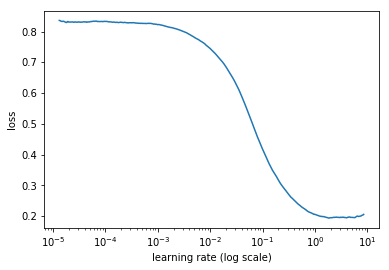

In [13]:
learn.sched.plot()

Objective is to find the maximum lr where the loss curve is significantly on a descent. That seems to be around 0.5.

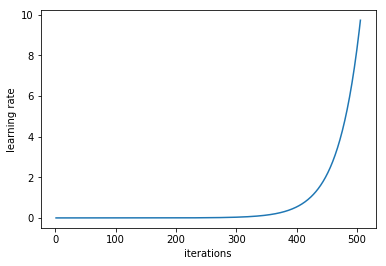

In [11]:
learn.sched.plot_lr()

In [54]:
learn = ConvLearner.pretrained(arch, data, precompute=True, metrics=[f2])
learn.fit(0.5, 3)

A Jupyter Widget

[ 0.       0.12645  0.11029  0.90524]                         
[ 1.       0.11815  0.10515  0.91032]                         
[ 2.       0.11473  0.10394  0.91221]                         



In [55]:
learn.precompute = False

In [56]:
learn.fit(0.5, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.11787  0.10198  0.91414]                        
[ 1.       0.11421  0.10159  0.91427]                        
[ 2.       0.11398  0.10097  0.91433]                        



In [57]:
learn.save("planet_freezed")

In [58]:
learn.load("planet_freezed")

# Differential learning rates

In [59]:
learn.unfreeze()

In [43]:
learn.lr_find()

A Jupyter Widget

[ 0.       0.15926  0.20433  0.86327]                        



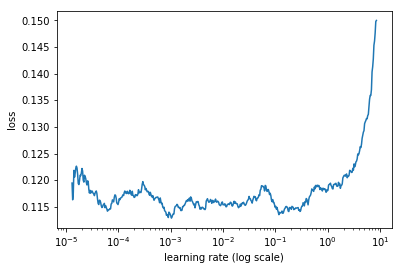

In [44]:
learn.sched.plot()

In [60]:
l = 0.1
lr = np.array([l/6, l/3, l])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.10319  0.09108  0.92485]                        
[ 1.       0.09681  0.08779  0.92743]                         
[ 2.       0.09468  0.08574  0.92969]                         
[ 3.       0.09496  0.08677  0.92789]                         
[ 4.       0.08844  0.08403  0.93162]                         
[ 5.       0.0854   0.08246  0.93114]                         
[ 6.       0.08556  0.08248  0.93147]                         



In [61]:
l = 0.08
lr = np.array([l/9, l/3, l])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.08896  0.08258  0.93185]                         
[ 1.       0.08766  0.0827   0.93083]                         
[ 2.       0.08444  0.08238  0.93188]                         
[ 3.       0.08838  0.08336  0.93063]                         
[ 4.       0.0863   0.08274  0.93082]                         
[ 5.       0.08118  0.08167  0.9323 ]                         
[ 6.       0.08258  0.08148  0.93251]                         



In [62]:
learn.save("planet_unfreezed")

In [63]:
learn.load("planet_unfreezed")

# Training on all images

In [ ]:
val_idxs = get_cv_idxs(40479, val_pct=0.0001) # for all images, adjust this val_pct

arch = resnet34
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.05)

data = ImageClassifierData.from_csv(PATH, folder="train-jpg", csv_fname=f"{PATH}train_v2.csv", val_idxs=val_idxs,
                                    bs=64, tfms=tfms, suffix=".jpg", test_name="test-jpg")

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=True, metrics=[f2])
learn.fit(0.5, 3)
learn.precompute = False
learn.fit(0.5, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.12241  0.15565  0.91931]                         
[ 1.       0.1171   0.1673   0.92708]                         
[ 2.       0.11375  0.153    0.91747]                         



A Jupyter Widget

[ 0.       0.11675  0.15775  0.91747]                        
[ 1.       0.11174  0.15578  0.91747]                        
[ 2.       0.11272  0.15888  0.91747]                        



In [8]:
learn.unfreeze()

l = 0.1
lr = np.array([l/6, l/3, l])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

l = 0.08
lr = np.array([l/9, l/3, l])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.save("planet_unf_all")

A Jupyter Widget

[ 0.       0.1028   0.16276  0.89272]                         
[ 1.       0.09853  0.13704  0.91226]                         
[ 2.       0.09126  0.13005  0.89663]                         
[ 3.       0.09276  0.13743  0.93309]                         
[ 4.       0.08973  0.12717  0.91747]                         
[ 5.       0.09008  0.13372  0.86166]                         
[ 6.       0.08588  0.12984  0.86201]                         



A Jupyter Widget

[ 0.       0.0863   0.13207  0.91747]                         
[ 1.       0.08512  0.11907  0.92972]                         
[ 2.       0.08475  0.12868  0.91747]                         
[ 3.       0.08581  0.14056  0.87708]                         
[ 4.       0.08315  0.12047  0.89271]                         
[ 5.       0.0829   0.12579  0.9065 ]                         
[ 6.       0.08096  0.12131  0.91747]                         



# Predict on test set

In [9]:
import resource
rlimit = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (2048, rlimit[1]))

In [10]:
preds = learn.TTA(is_test=True)

This takes around 17 minutes on a p2.xlarge instance. (around 276 s/it)

In [11]:
fnames = [x.split("/")[1].split(".")[0] for x in data.test_dl.dataset.fnames]
len(fnames)

61191

In [12]:
classes = np.array(data.classes, dtype=str)
res = [" ".join(classes[np.where(pp > 0.2)]) for pp in preds[0]] 

In [13]:
final = pd.DataFrame({'image_name': fnames, 'tags': res})

f = "submit2.csv"
final.to_csv(f"{PATH}{f}", index=False)

from IPython.display import FileLink
FileLink(f"{PATH}{f}")

/home/ubuntu/fastai/courses/dl1/data/planet/submit2.csv